In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

In [11]:
# splid the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# configure lime to explain the model decision
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

In [14]:
# inference-step
i = 1
instance = X_test[i]
prediction = model.predict(instance.reshape(1, -1))[0]
probs = model.predict_proba(instance.reshape(1, -1))[0]

print("🔍 Vorhersage:")
print(f"- Wahrscheinlichkeiten: {dict(zip(class_names, np.round(probs, 3)))}")
print(f"- Modell sagt: {class_names[prediction]}")
print(f"- Tatsächliche Klasse: {class_names[y_test[i]]}\n")

🔍 Vorhersage:
- Wahrscheinlichkeiten: {'setosa': 0.94, 'versicolor': 0.06, 'virginica': 0.0}
- Modell sagt: setosa
- Tatsächliche Klasse: setosa


In [15]:
# generate explanation for the predicted class
exp = explainer.explain_instance(
    instance,
    model.predict_proba,
    num_features=4,
    top_labels=1
)

In [16]:
print(f"LIME-explanation for the predicted class ({class_names[prediction]}):\n")
if prediction in exp.local_exp:
    for feature, weight in exp.as_list(label=prediction):
        impact = "POSITIVE" if weight > 0 else "NEGATIVE"
        print(f"  - {feature:40s} | Impact: {weight:+.4f} | {impact}")
else:
    print("No Explanation available ")

LIME-explanation for the predicted class (setosa):

  - petal width (cm) <= 0.30                 | Impact: +0.3901 | POSITIVE
  - 1.60 < petal length (cm) <= 4.30         | Impact: -0.0883 | NEGATIVE
  - sepal width (cm) > 3.30                  | Impact: +0.0156 | POSITIVE
  - 5.10 < sepal length (cm) <= 5.80         | Impact: -0.0029 | NEGATIVE


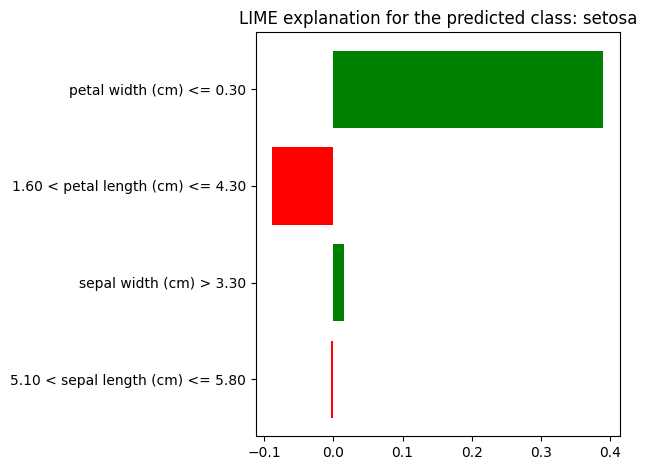

In [17]:
# plotting the outcome
fig = exp.as_pyplot_figure(label=prediction)
plt.title(f"LIME explanation for the predicted class: {class_names[prediction]}")
plt.tight_layout()
plt.show()
